In [1]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [2]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot


In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pydot

In [5]:
import graphviz

In [6]:
from tensorflow.keras.datasets.mnist import load_data

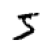

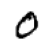

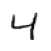

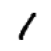

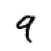

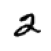

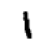

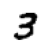

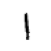

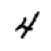

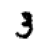

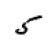

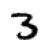

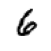

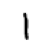

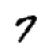

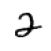

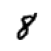

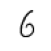

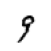

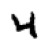

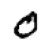

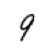

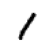

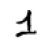

In [7]:
(train_x , Train_y),(test_x , test_y) = load_data()
for i in range(25):
    pyplot.subplot(5,5,1+i)
    pyplot.axis('off')
    pyplot.imshow(train_x[i],cmap='gray_r')
    pyplot.show()

In [8]:
def define_discriminator(in_shape=(28,28,1)):
    model=Sequential()
    model.add(Conv2D(64,(3,3), strides=(2,2), padding = 'same' , input_shape = in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3), strides=(2,2), padding = 'same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1 , activation = 'sigmoid'))
    
    opt = Adam(learning_rate=0.0002 , beta_1=0.5)
    model.compile(loss='bianary_crossentropy' , optimizer= opt , metrics=['accuracy'])
    return model


In [9]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png' , show_shapes = True , show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [10]:
def define_generator(latent_dim):
    model=Sequential()
    n_nodes = 128*7*7
    model.add(Dense(n_nodes , input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    #upsample to 14*14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding = 'same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28*28
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding = 'same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(1,(7,7), activation='sigmoid', padding = 'same'))
    return model

In [11]:
latent_dim = 100
model=define_generator(latent_dim)   
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                            

In [12]:
def define_gan(g_model , d_model):
    #make weight in discriminator non-trainable
    d_model.trainable=False
    #connect them
    model=Sequential()
    model.add(g_model)
    model.add(d_model)
    
    opt = Adam(lr=0.0002 , beta_1=0.5)
    model.compile(loss='binary_crossentropy' , optimizer= opt)
    return model

In [13]:
latent_dim = 100
g_model=define_generator(latent_dim)

d_model=define_discriminator()

gan_model=define_gan(g_model , d_model)

gan_model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True , show_layer_names=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 28, 28, 1)         1164289   
                                                                 
 sequential_3 (Sequential)   (None, 1)                 40705     
                                                                 
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


C:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
def load_real_samples():
    (train_x,_),(_, _) = load_data()
    # expand to 3D i.e. add channels dimension
    x=expand_dims(traimn_x , axis=-1)
    # convert from unsigned ints to floats
    x=x.astype('float32')
    
    #scaling
    x=x / 255
    return x
    

In [15]:
def generate_real_samples(datasets , n_samples):
    #choose random instances
    ix=randint(0, dataset.shape[0], n_samples)
    
    # retrieve selected images
    x = dataset[ix]
    
    # 